In [1]:
import pandas as pd

# Specify the file path of the CSV file
file_path = "/content/drive/MyDrive/Tasks Datasets/crime-data-from-2010-to-present.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Tasks Datasets/crime-data-from-2010-to-present.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993259 entries, 0 to 1993258
Data columns (total 26 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DR Number               int64  
 1   Date Reported           object 
 2   Date Occurred           object 
 3   Time Occurred           int64  
 4   Area ID                 int64  
 5   Area Name               object 
 6   Reporting District      int64  
 7   Crime Code              int64  
 8   Crime Code Description  object 
 9   MO Codes                object 
 10  Victim Age              int64  
 11  Victim Sex              object 
 12  Victim Descent          object 
 13  Premise Code            float64
 14  Premise Description     object 
 15  Weapon Used Code        float64
 16  Weapon Description      object 
 17  Status Code             object 
 18  Status Description      object 
 19  Crime Code 1            float64
 20  Crime Code 2            float64
 21  Crime Code 3            float64

In [ ]:
df["MO Codes"].isna().sum()

215872

In [ ]:
df["MO Codes"].value_counts()

MO Codes
0344                             204040
0329                              84861
1501                              40502
0416                              28461
0325                              25911
                                  ...  
1402 0416 2004 0445 0319              1
0519 1259 1402 1501                   1
0800 0601 0344 0100 1916              1
0601 0913 0337 0334 0411 0917         1
1407 1300 1309 0906                   1
Name: count, Length: 451037, dtype: int64

In [ ]:
df["Status Description"].unique()

array(['Invest Cont', 'Adult Arrest', 'Adult Other', 'Juv Other',
       'Juv Arrest', 'UNK'], dtype=object)

In [ ]:
# Define a function to determine if an individual is a suspect based on MO Codes
def is_suspect(mo_codes):
    if pd.isna(mo_codes):
        return 0  # If MO Codes are missing, assume not a suspect
    else:
        return 1

# Apply the function to create the target variable
df['Is Suspect'] = df['MO Codes'].apply(is_suspect)

# Optionally, you can also incorporate other criteria mentioned above to refine the target variable

# Display the first few rows of the DataFrame with the new target variable
df[['MO Codes', 'Is Suspect']].head()


,MO Codes,Is Suspect
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0


In [ ]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Is Suspect
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals...",0
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals...",0
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals...",0
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False...",0
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals...",0


In [ ]:
df.isna().sum()

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description          0
MO Codes                   215872
Victim Age                      0
Victim Sex                 185960
Victim Descent             186006
Premise Code                   50
Premise Description           135
Weapon Used Code          1325641
Weapon Description        1325642
Status Code                     3
Status Description              0
Crime Code 1                    9
Crime Code 2              1863098
Crime Code 3              1990024
Crime Code 4              1993163
Address                         0
Cross Street              1659507
Location                        0
Is Suspect                      0
dtype: int64

In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Display columns with missing values sorted by their percentage
missing_percentage[missing_percentage > 0].sort_values(ascending=False)

Crime Code 4           99.995184
Crime Code 3           99.837703
Crime Code 2           93.469940
Cross Street           83.255964
Weapon Description     66.506259
Weapon Used Code       66.506209
MO Codes               10.830103
Victim Descent          9.331753
Victim Sex              9.329445
Premise Description     0.006773
Premise Code            0.002508
Crime Code 1            0.000452
Status Code             0.000151
dtype: float64

In [ ]:
df.drop(['Crime Code 2', 'Crime Code 3', 'Crime Code 4', 'Cross Street', 'MO Codes'], axis=1, inplace=True)


In [ ]:
# Impute 'Unknown' for categorical columns with moderate missing values
for column in ['Weapon Description', 'Weapon Used Code', 'Victim Descent', 'Victim Sex']:
    df[column].fillna('Unknown', inplace=True)

# Impute the mode for columns with very low missing values
for column in ['Premise Description', 'Premise Code', 'Crime Code 1', 'Status Code']:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)


In [ ]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Victim Age,...,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Crime Code 1,Address,Location,Is Suspect
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,0,...,101.0,STREET,Unknown,Unknown,IC,Invest Cont,510.0,VAN NESS,"{'latitude': '34.0454', 'needs_recoding': Fals...",0
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,0,...,101.0,STREET,Unknown,Unknown,IC,Invest Cont,510.0,88TH,"{'latitude': '33.9572', 'needs_recoding': Fals...",0
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,0,...,108.0,PARKING LOT,Unknown,Unknown,IC,Invest Cont,510.0,YORK,"{'latitude': '34.1211', 'needs_recoding': Fals...",0
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,0,...,101.0,STREET,Unknown,Unknown,IC,Invest Cont,510.0,EL DORADO,"{'latitude': '34.241', 'needs_recoding': False...",0
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,0,...,101.0,STREET,Unknown,Unknown,IC,Invest Cont,510.0,GLENOAKS,"{'latitude': '34.3147', 'needs_recoding': Fals...",0


In [ ]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'], errors='coerce')

In [ ]:
print("Unparsed 'Date Reported':", df['Date Reported'].isna().sum())
print("Unparsed 'Date Occurred':", df['Date Occurred'].isna().sum())

Unparsed 'Date Reported': 99290
Unparsed 'Date Occurred': 0


In [ ]:
categorical_columns = ['Area Name', 'Crime Code Description', 'Status Description', 'Victim Sex', 'Victim Descent']

# Standardizing to title case
for column in categorical_columns:
    df[column] = df[column].str.title().str.strip()

# Optionally, display unique values to check for inconsistencies
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())


Unique values in Area Name:
['Olympic' 'Southeast' 'Northeast' 'Foothill' 'Mission' 'Newton'
 'West Valley' '77Th Street' 'Pacific' 'N Hollywood' 'Topanga'
 'Devonshire' 'Rampart' 'Central' 'Southwest' 'Hollenbeck' 'Hollywood'
 'Harbor' 'West La' 'Wilshire' 'Van Nuys']
Unique values in Crime Code Description:
['Vehicle - Stolen' 'Burglary From Vehicle' 'Indecent Exposure'
 'Other Assault' 'Other Miscellaneous Crime'
 'Embezzlement, Grand Theft ($950.01 & Over)' 'Disturbing The Peace'
 'Burglary' 'Child Annoying (17Yrs & Under)'
 'Theft Plain - Petty ($950 & Under)'
 'Vandalism - Misdeameanor ($399 Or Under)' 'Cruelty To Animals'
 'Theft Of Identity' 'Arson' 'Theft, Person' 'Burglary, Attempted'
 'Trespassing' 'Theft From Motor Vehicle - Petty ($950 & Under)'
 'Violation Of Court Order' 'Attempted Robbery'
 'Letters, Lewd  -  Telephone Calls, Lewd' 'Robbery'
 'Crm Agnst Chld (13 Or Under) (14-15 & Susp 10 Yrs Older)'
 'Rape, Forcible' 'Purse Snatching' 'Bike - Stolen' 'Brandish Weapon'


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['Area Name', 'Crime Code Description', 'Victim Sex', 'Victim Descent',
       'Premise Description', 'Weapon Used Code', 'Weapon Description',
       'Status Code', 'Status Description', 'Address', 'Location '],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Applying label encoding to each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    # Fit label encoder and return encoded labels
    df[column] = le.fit_transform(df[column].astype(str))

# Checking the transformed DataFrame
df.head()


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Victim Age,...,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Crime Code 1,Address,Location,Is Suspect
0,102005556,2010-01-25,2010-01-22,2300,20,11,2071,510,135,0,...,101.0,STREET,Unknown,Unknown,IC,2,510.0,VAN NESS,"{'latitude': '34.0454', 'needs_recoding': Fals...",0
1,101822289,2010-11-11,2010-11-10,1800,18,14,1803,510,135,0,...,101.0,STREET,Unknown,Unknown,IC,2,510.0,88TH,"{'latitude': '33.9572', 'needs_recoding': Fals...",0
2,101105609,2010-01-28,2010-01-27,2230,11,10,1125,510,135,0,...,108.0,PARKING LOT,Unknown,Unknown,IC,2,510.0,YORK,"{'latitude': '34.1211', 'needs_recoding': Fals...",0
3,101620051,2010-11-11,2010-11-07,1600,16,3,1641,510,135,0,...,101.0,STREET,Unknown,Unknown,IC,2,510.0,EL DORADO,"{'latitude': '34.241', 'needs_recoding': False...",0
4,101910498,2010-04-07,2010-04-07,1600,19,7,1902,510,135,0,...,101.0,STREET,Unknown,Unknown,IC,2,510.0,GLENOAKS,"{'latitude': '34.3147', 'needs_recoding': Fals...",0


In [ ]:
# Extract day of the week (0=Monday, 6=Sunday)
df['Day of Week Occurred'] = df['Date Occurred'].dt.dayofweek


In [ ]:
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# First convert 'Time Occurred' into hour of the day
df['Hour Occurred'] = df['Time Occurred'] // 100
df['Part of Day'] = df['Hour Occurred'].apply(get_part_of_day)


In [ ]:
severity_mapping = {
    'VEHICLE - STOLEN': 2,
    'BURGLARY': 3,
    'INDECENT EXPOSURE': 1,
    'OTHER ASSAULT': 2,
    'OTHER MISCELLANEOUS CRIME': 1,
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 3,
    'DISTURBING THE PEACE': 1,
    'CHILD ANNOYING (17YRS & UNDER)': 2,
    'THEFT PLAIN - PETTY ($950 & UNDER)': 1,
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 1,
    'CRUELTY TO ANIMALS': 2,
    'THEFT OF IDENTITY': 3,
    'ARSON': 4,
    'THEFT, PERSON': 2,
    'BURGLARY, ATTEMPTED': 2,
    'TRESPASSING': 1,
    'VIOLATION OF COURT ORDER': 2,
    'ATTEMPTED ROBBERY': 3,
    'ROBBERY': 4,
    'RAPE, FORCIBLE': 5,
    'PURSE SNATCHING': 2,
    'BIKE - STOLEN': 1,
    'BRANDISH WEAPON': 3,
    'LEWD CONDUCT': 2,
    'VIOLATION OF RESTRAINING ORDER': 2,
    'INTIMATE PARTNER - SIMPLE ASSAULT': 3,
    'STALKING': 3,
    'PIMPING': 4,
    'EXTORTION': 4,
    'PICKPOCKET': 2,
    'RECKLESS DRIVING': 2,
    'VEHICLE - ATTEMPT STOLEN': 2,
    'BATTERY - SIMPLE ASSAULT': 3,
    'BATTERY POLICE (SIMPLE)': 3,
    'INTIMATE PARTNER - AGGRAVATED ASSAULT': 4,
    'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)': 2,
    'CRIMINAL THREATS - NO WEAPON DISPLAYED': 3,
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 4,
    'FALSE IMPRISONMENT': 3,
    'KIDNAPPING': 5,
    'CRIMINAL HOMICIDE': 5,
    'BOMB SCARE': 4,
    'KIDNAPPING - GRAND ATTEMPT': 5,
    'SHOTS FIRED AT INHABITED DWELLING': 4,
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 5,
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 5,
    'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': 5,
    'LYNCHING': 4,
    'MANSLAUGHTER, NEGLIGENT': 4,
    'CHILD PORNOGRAPHY': 5,
    # Continue with additional crimes as necessary
}

df['Crime Severity'] = df['Crime Code Description'].map(severity_mapping).fillna(0)


In [ ]:
print(df.columns)

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'Victim Age', 'Victim Sex', 'Victim Descent',
       'Premise Code', 'Premise Description', 'Weapon Used Code',
       'Weapon Description', 'Status Code', 'Status Description',
       'Crime Code 1', 'Address', 'Location ', 'Is Suspect',
       'Day of Week Occurred', 'Hour Occurred', 'Part of Day',
       'Crime Severity'],
      dtype='object')


In [ ]:
# Display the DataFrame with new features
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Victim Age,...,Status Code,Status Description,Crime Code 1,Address,Location,Is Suspect,Day of Week Occurred,Hour Occurred,Part of Day,Crime Severity
0,102005556,2010-01-25,2010-01-22,2300,20,11,2071,510,135,0,...,IC,2,510.0,VAN NESS,"{'latitude': '34.0454', 'needs_recoding': Fals...",0,4,23,Night,0.0
1,101822289,2010-11-11,2010-11-10,1800,18,14,1803,510,135,0,...,IC,2,510.0,88TH,"{'latitude': '33.9572', 'needs_recoding': Fals...",0,2,18,Evening,0.0
2,101105609,2010-01-28,2010-01-27,2230,11,10,1125,510,135,0,...,IC,2,510.0,YORK,"{'latitude': '34.1211', 'needs_recoding': Fals...",0,2,22,Night,0.0
3,101620051,2010-11-11,2010-11-07,1600,16,3,1641,510,135,0,...,IC,2,510.0,EL DORADO,"{'latitude': '34.241', 'needs_recoding': False...",0,6,16,Afternoon,0.0
4,101910498,2010-04-07,2010-04-07,1600,19,7,1902,510,135,0,...,IC,2,510.0,GLENOAKS,"{'latitude': '34.3147', 'needs_recoding': Fals...",0,2,16,Afternoon,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only the numeric columns for the correlation calculation
numeric_df = df.select_dtypes(include=[np.number])  # Only keeps numeric columns

# Calculate the correlation matrix on the numeric columns
corr_matrix = numeric_df.corr()


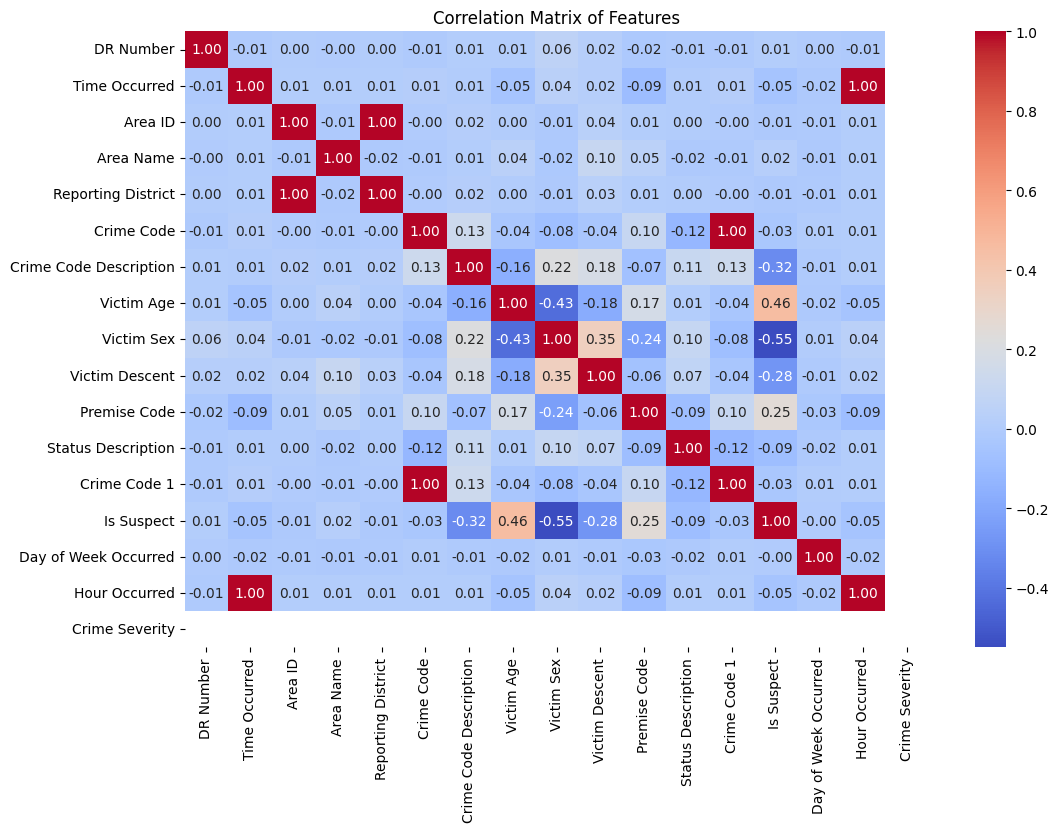

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
# Identify highly correlated features (threshold = 0.85)
threshold = 0.85
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute value of correlation coefficient
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Remove the highly correlated features
df_reduced = df.drop(correlated_features, axis=1)

# Display the DataFrame after removing highly correlated features
print("Removed Features:", correlated_features)
print("Remaining columns in DataFrame:", df_reduced.columns)


Removed Features: {'Reporting District', 'Hour Occurred', 'Crime Code 1'}
Remaining columns in DataFrame: Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Crime Code', 'Crime Code Description',
       'Victim Age', 'Victim Sex', 'Victim Descent', 'Premise Code',
       'Premise Description', 'Weapon Used Code', 'Weapon Description',
       'Status Code', 'Status Description', 'Address', 'Location ',
       'Is Suspect', 'Day of Week Occurred', 'Part of Day', 'Crime Severity'],
      dtype='object')


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # Assuming 'df_reduced' is your DataFrame after all preprocessing steps.

# # Convert date-time columns to numeric features
# df_reduced['Year Reported'] = df_reduced['Date Reported'].dt.year
# df_reduced['Month Reported'] = df_reduced['Date Reported'].dt.month
# df_reduced['Day Reported'] = df_reduced['Date Reported'].dt.day

# df_reduced['Year Occurred'] = df_reduced['Date Occurred'].dt.year
# df_reduced['Month Occurred'] = df_reduced['Date Occurred'].dt.month
# df_reduced['Day Occurred'] = df_reduced['Date Occurred'].dt.day

# # Drop original date-time columns
# df_reduced.drop(['Date Reported', 'Date Occurred'], axis=1, inplace=True)

# # Feature matrix and target vector
# X = df_reduced.drop('Is Suspect', axis=1)  # All other features
# y = df_reduced['Is Suspect']  # Target variable

# # Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Exclude non-numeric columns from scaling
# numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
# scaler = StandardScaler()
# X_train_scaled = X_train.copy()
# X_test_scaled = X_test.copy()

# # Scale only numeric columns
# X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
# X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# # Logistic Regression
# log_reg = LogisticRegression(max_iter=1000)  # Adjust max_iter if convergence issues arise
# log_reg.fit(X_train_scaled, y_train)
# y_pred_log = log_reg.predict(X_test_scaled)

# # Random Forest
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)  # No need to scale features for Random Forest
# y_pred_rf = rf.predict(X_test)

# # Evaluating the models
# print("Logistic Regression Classification Report:")
# print(classification_report(y_test, y_pred_log))

# print("Random Forest Classification Report:")
# print(classification_report(y_test, y_pred_rf))

# # Confusion matrix
# print("Logistic Regression Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_log))

# print("Random Forest Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_rf))

# # Accuracy
# print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred_log))
# print("Accuracy of Random Forest: ", accuracy_score(y_test, y_pred_rf))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print DataFrame columns to verify presence of all necessary columns
print("DataFrame columns before any operations:", df_reduced.columns)

# Convert all object-type categorical columns to string to ensure consistency
for column in df_reduced.select_dtypes(include=['object']).columns:
    df_reduced[column] = df_reduced[column].astype(str)

# Check and confirm the presence of 'Is Suspect'
if 'Is Suspect' not in df_reduced.columns:
    raise ValueError("The column 'Is Suspect' is missing from the DataFrame.")

# Identify categorical and numeric columns excluding the target column 'Is Suspect'
categorical_cols = df_reduced.select_dtypes(include=['object']).columns
numeric_cols = df_reduced.select_dtypes(exclude=['object', 'datetime64[ns]']).columns.drop('Is Suspect')

# Setup preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline for each model
log_reg_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(max_iter=1000))])
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', RandomForestClassifier())])

# Splitting the dataset into training and testing sets
X = df_reduced.drop('Is Suspect', axis=1)  # Ensure 'Is Suspect' is not in the features
y = df_reduced['Is Suspect']  # Ensure 'Is Suspect' is the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm DataFrame columns right before fitting models
print("DataFrame columns before model fitting:", X_train.columns)

# Fitting the models
log_reg_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)

# Making predictions
y_pred_log = log_reg_pipe.predict(X_test)
y_pred_rf = rf_pipe.predict(X_test)

# Evaluating the models
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrices
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Accuracy
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred_log))
print("Accuracy of Random Forest: ", accuracy_score(y_test, y_pred_rf))


DataFrame columns before any operations: Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Crime Code', 'Crime Code Description',
       'Victim Age', 'Victim Sex', 'Victim Descent', 'Premise Code',
       'Premise Description', 'Weapon Used Code', 'Weapon Description',
       'Status Code', 'Status Description', 'Address', 'Location ',
       'Is Suspect', 'Day of Week Occurred', 'Part of Day', 'Crime Severity'],
      dtype='object')
DataFrame columns before model fitting: Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Crime Code', 'Crime Code Description',
       'Victim Age', 'Victim Sex', 'Victim Descent', 'Premise Code',
       'Premise Description', 'Weapon Used Code', 'Weapon Description',
       'Status Code', 'Status Description', 'Address', 'Location ',
       'Day of Week Occurred', 'Part of Day', 'Crime Severity'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
